In [3]:
## R script to process the single cell human PDAC data (GSE155698). 
##

In [1]:
setwd("~/Documents/GSE155698/")

In [2]:
files = list.files(recursive = T)
print(files)

  [1] "bars_seurat.csv"                                           
  [2] "newest.RData"                                              
  [3] "PDAC_PBMC_1/filtered_feature_bc_matrix/barcodes.tsv.gz"    
  [4] "PDAC_PBMC_1/filtered_feature_bc_matrix/features.tsv.gz"    
  [5] "PDAC_PBMC_1/filtered_feature_bc_matrix/matrix.mtx.gz"      
  [6] "PDAC_PBMC_10A/filtered_feature_bc_matrix/barcodes.tsv.gz"  
  [7] "PDAC_PBMC_10A/filtered_feature_bc_matrix/features.tsv.gz"  
  [8] "PDAC_PBMC_10A/filtered_feature_bc_matrix/matrix.mtx.gz"    
  [9] "PDAC_PBMC_10B/filtered_feature_bc_matrix/barcodes.tsv.gz"  
 [10] "PDAC_PBMC_10B/filtered_feature_bc_matrix/features.tsv.gz"  
 [11] "PDAC_PBMC_10B/filtered_feature_bc_matrix/matrix.mtx.gz"    
 [12] "PDAC_PBMC_11/filtered_feature_bc_matrix/barcodes.tsv.gz"   
 [13] "PDAC_PBMC_11/filtered_feature_bc_matrix/features.tsv.gz"   
 [14] "PDAC_PBMC_11/filtered_feature_bc_matrix/matrix.mtx.gz"     
 [15] "PDAC_PBMC_12/filtered_feature_bc_matrix/barcodes.tsv.gz

In [3]:
### Filtering out PBMC data and duplicate samples (due to their processing using different sequencing runs)
## Samples being filtered out are 11A & 11B

files = files[grep("TISSUE", files)]
idx = grep("_11", files)
files = files[-idx]
print(files)

 [1] "PDAC_TISSUE_1/filtered_feature_bc_matrix/barcodes.tsv.gz" 
 [2] "PDAC_TISSUE_1/filtered_feature_bc_matrix/features.tsv.gz" 
 [3] "PDAC_TISSUE_1/filtered_feature_bc_matrix/matrix.mtx.gz"   
 [4] "PDAC_TISSUE_10/filtered_feature_bc_matrix/barcodes.tsv.gz"
 [5] "PDAC_TISSUE_10/filtered_feature_bc_matrix/features.tsv.gz"
 [6] "PDAC_TISSUE_10/filtered_feature_bc_matrix/matrix.mtx.gz"  
 [7] "PDAC_TISSUE_12/filtered_feature_bc_matrix/barcodes.tsv.gz"
 [8] "PDAC_TISSUE_12/filtered_feature_bc_matrix/features.tsv.gz"
 [9] "PDAC_TISSUE_12/filtered_feature_bc_matrix/matrix.mtx.gz"  
[10] "PDAC_TISSUE_13/filtered_feature_bc_matrix/barcodes.tsv.gz"
[11] "PDAC_TISSUE_13/filtered_feature_bc_matrix/features.tsv.gz"
[12] "PDAC_TISSUE_13/filtered_feature_bc_matrix/matrix.mtx.gz"  
[13] "PDAC_TISSUE_14/filtered_feature_bc_matrix.h5"             
[14] "PDAC_TISSUE_15/filtered_feature_bc_matrix/barcodes.tsv.gz"
[15] "PDAC_TISSUE_15/filtered_feature_bc_matrix/features.tsv.gz"
[16] "PDAC_TISSUE_15/filt

In [4]:
### creating variable with concise directory containing all samples (n = 14) under consideration. 
nam = gsub("matrix.+$", "matrix", files)
nam = unique(nam)
ix = grep("h5", nam)
nam = nam[-ix]
print(nam)
print(length(nam))

 [1] "PDAC_TISSUE_1/filtered_feature_bc_matrix" 
 [2] "PDAC_TISSUE_10/filtered_feature_bc_matrix"
 [3] "PDAC_TISSUE_12/filtered_feature_bc_matrix"
 [4] "PDAC_TISSUE_13/filtered_feature_bc_matrix"
 [5] "PDAC_TISSUE_14/filtered_feature_bc_matrix"
 [6] "PDAC_TISSUE_15/filtered_feature_bc_matrix"
 [7] "PDAC_TISSUE_16/filtered_feature_bc_matrix"
 [8] "PDAC_TISSUE_2/filtered_feature_bc_matrix" 
 [9] "PDAC_TISSUE_3/filtered_feature_bc_matrix" 
[10] "PDAC_TISSUE_4/filtered_feature_bc_matrix" 
[11] "PDAC_TISSUE_5/filtered_feature_bc_matrix" 
[12] "PDAC_TISSUE_6/filtered_feature_bc_matrix" 
[13] "PDAC_TISSUE_7/filtered_feature_bc_matrix" 
[14] "PDAC_TISSUE_8/filtered_feature_bc_matrix" 
[15] "PDAC_TISSUE_9/filtered_feature_bc_matrix" 
[1] 15


In [5]:
library(Seurat)
library(rhdf5)

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



In [6]:
### using for loop to load all the sample matrices into a single sparse matrix 
nam2 = nam[-5]
c = c()
a = Read10X(nam2[1])
c = rep(nam2[1], ncol(a))
for(i in 2:length(nam2)){
    a1 = Read10X(nam2[i])
    c = append(c, rep(nam2[i], ncol(a1)))
    a = cbind(a, a1)}

In [9]:
## In our manuscript we removed on PDAC_TISSUE_14 due inagreement between the file formats. Also PDAC_TISSUE_14 has no viable cells expressing MUC16

new = Read10X_h5("PDAC_TISSUE_14/filtered_feature_bc_matrix.h5")
all(rownames(a) == rownames(new))
aa = cbind(a, new)
print(dim(aa))
c = append(c, rep("PDAC_TISSUE_14", ncol(new)))
c = gsub(".filter.+$", "", c)
a = aa


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


[1] TRUE

[1] 32738 42692


In [10]:
### subsequently transforming it to a seurat matrix. 
### The seurat object has  32738 features 
pbmc = CreateSeuratObject(a)
pbmc$orig.ident = c
print(pbmc)

Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
32738 features across 42692 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)


In [11]:
### calculating percentage of mitochondrial reads
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")


In [12]:
### Subset the matrix to remove cells with > 5% mitochondrial reads and expression of < 200 features
### filtered object should have around 14691 cells (19429 cells if PDAC_TISSUE_14 is considered)
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 &  percent.mt < 5)
print(pbmc)

An object of class Seurat 
32738 features across 16635 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)


In [13]:
### using standard log normalize for normalization
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)


In [14]:
## using 2000 highly variable features for PCA
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))


Centering and scaling data matrix

PC_ 1 
Positive:  IGFBP7, CALD1, COL1A2, BGN, COL3A1, SPARC, AEBP1, DCN, COL1A1, C1R 
	   COL6A2, C1S, MGP, THY1, MXRA8, FBN1, LUM, COL5A2, MYL9, COL4A2 
	   FSTL1, CNN3, COX7A1, TAGLN, CDH11, PCOLCE, SULF1, IGFBP4, CCDC80, COL6A3 
Negative:  ITGB2, LYZ, FCER1G, SERPINA1, G0S2, IGSF6, IL1B, IL8, S100A12, TREM1 
	   CD74, IL1R2, FCGR3A, ANPEP, CCL4, CD14, CD247, GPR183, IL1RN, CD7 
	   HLA-DQB1, HSPA6, DUSP2, NPL, HLA-DRB1, RP11-1143G9.4, C19orf59, HLA-DRA, CD27, FCGR2B 
PC_ 2 
Positive:  SMIM22, FXYD3, TM4SF1, CLDN4, GPRC5A, KRT8, KRT19, ELF3, KRT18, TSPAN1 
	   CEACAM6, KRT7, S100A14, TACSTD2, LMO7, SDCBP2, AGR2, PDZK1IP1, LGALS4, ATP1B1 
	   LCN2, TMC5, TSPAN8, LIPH, GOLM1, PLS1, LAMB3, CEACAM5, RP11-462G2.1, SLPI 
Negative:  ITGB2, FCER1G, HLA-DPB1, HLA-DPA1, FCGR3A, CD14, IGSF6, HLA-DRA, IL1B, FGL2 
	   HLA-DQB1, GPNMB, RGS1, GPR183, HLA-DQA1, TREM1, CCL4, CD74, FCGR2B, PLIN2 
	   ANPEP, CYBB, MS4A6A, S100A12, CD84, APOE, MS4A7, LAIR1, HLA-DQA2, V

In [15]:
### considering first 35 PCs explaining 85 % of the variance to perform clustering
sum(pbmc@reductions$pca@stdev/sum(pbmc@reductions$pca@stdev)[1:35])
pbmc <- FindNeighbors(pbmc, dims = 1:35)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Warning message in pbmc@reductions$pca@stdev/sum(pbmc@reductions$pca@stdev)[1:35]:
“longer object length is not a multiple of shorter object length”


[1] NA

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16635
Number of edges: 671553

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9445
Number of communities: 26
Elapsed time: 1 seconds


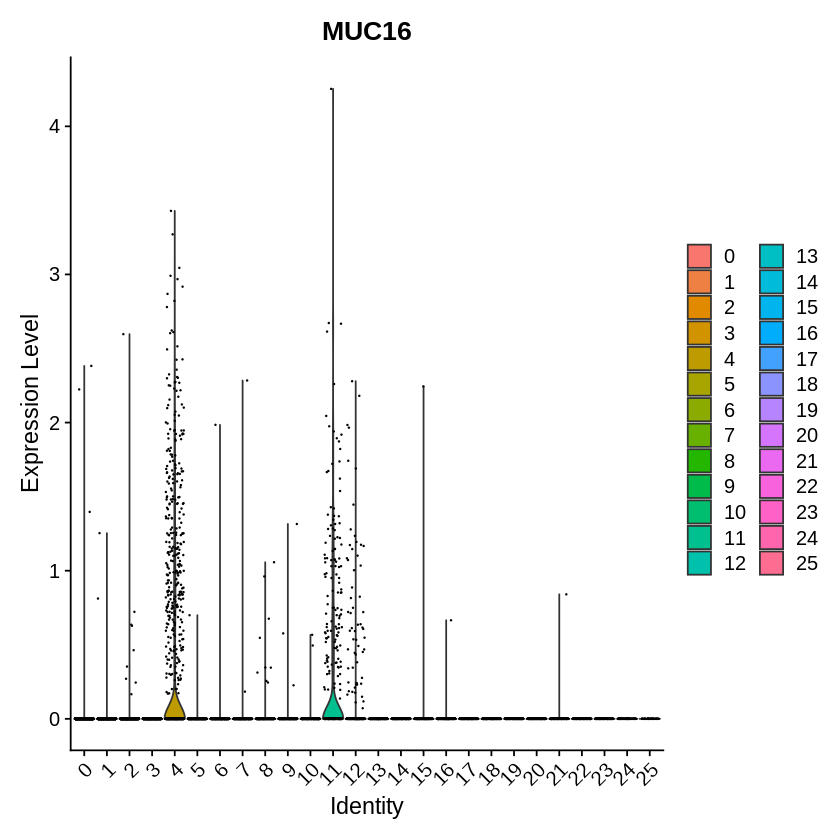

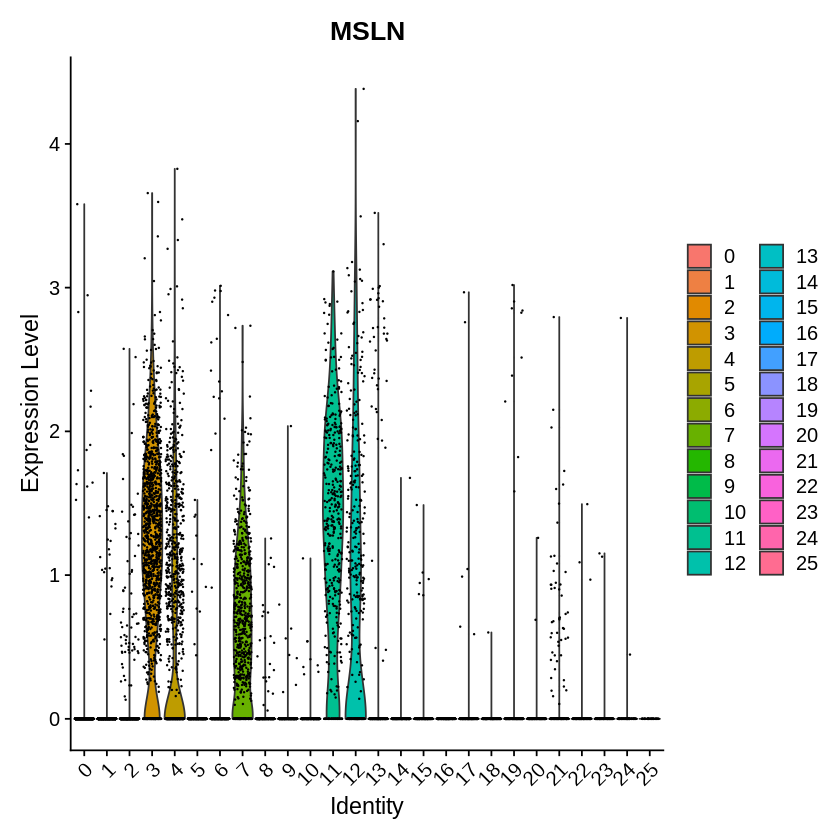

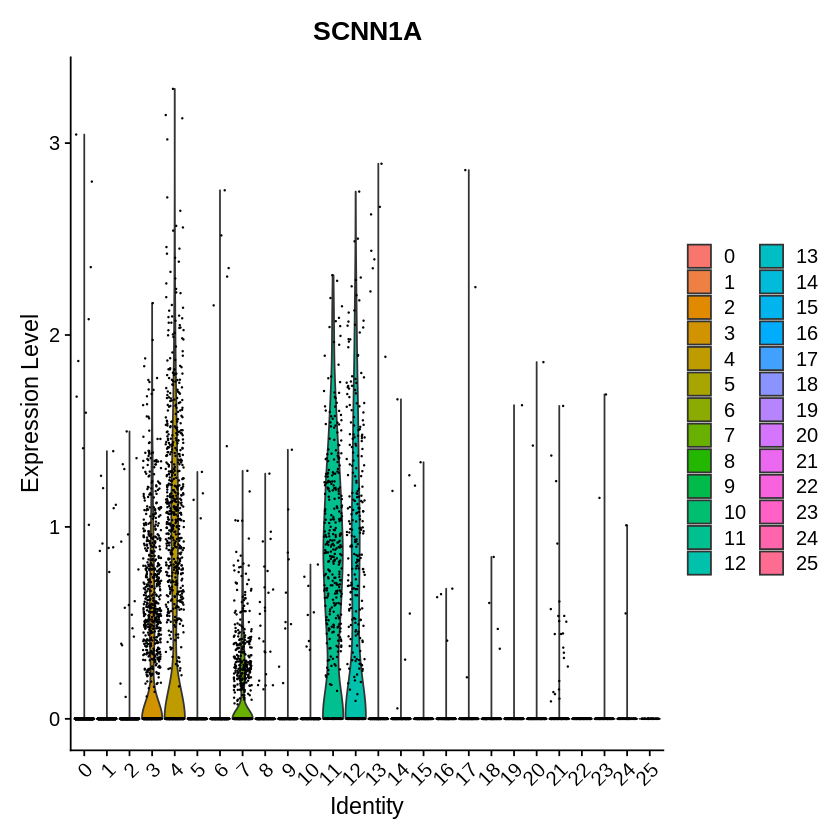

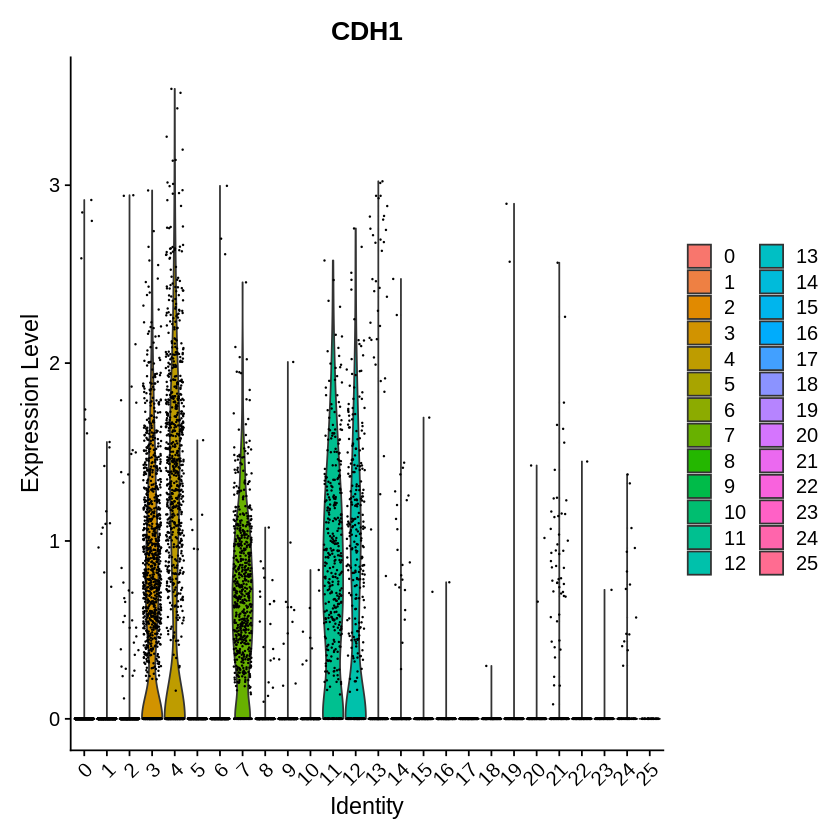

In [45]:
### Violin plots for observing the expression profiles of GOIs
VlnPlot(pbmc, features = c("MUC16"))
VlnPlot(pbmc, features = c("MSLN"))
VlnPlot(pbmc, features = c("SCNN1A"))
VlnPlot(pbmc, features = c("CDH1"))


In [24]:
### Evaluate 4th and 11th clusters 

tab = table(pbmc$orig.ident)
tab1 = table(pbmc$orig.ident[which(pbmc$seurat_clusters == 4)])
sorted1 = sort(tab1/tab[names(tab1)])


### Higher representation of cells of tissue 2 in cluster 4
### Cluster 11 on the other hand is more equally contributed by samples 5,8 & 3


tab = table(pbmc$orig.ident)
tab11 = table(pbmc$orig.ident[which(pbmc$seurat_clusters == 11)])
sorted2 = sort(tab11/tab[names(tab11)])



In [30]:
#### Create two groups with samples having low and high number cells of MUC16 (selection bias is possible)

intersect(names(sorted1)[1:10], names(sorted2)[1:5])

[1] "PDAC_TISSUE_7"  "PDAC_TISSUE_12" "PDAC_TISSUE_9"  "PDAC_TISSUE_4"

In [31]:
low = c('PDAC_TISSUE_7', 'PDAC_TISSUE_12', 'PDAC_TISSUE_9', 'PDAC_TISSUE_4')
high =   c('PDAC_TISSUE_2', 'PDAC_TISSUE_3', 'PDAC_TISSUE_5', 'PDAC_TISSUE_8')

c= c()
c1 =c() 
for(i in 1:length(low)){
 c = append(c, which(pbmc$orig.ident == low[i]))
    c1 = append(c, which(pbmc$orig.ident == high[i]))}
c = names(c)
c1 = names(c1)

In [42]:
markers <- FindMarkers(pbmc, ident.1 = c1, ident.2 =  c, min.pct = 0.25, only.pos = T)

In [44]:
head(markers, 50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PMEPA1,6.025842e-24,0.9257820,0.254,0.187,1.972740e-19
GSTP1,2.802105e-21,0.5011573,0.458,0.393,9.173530e-17
RPL8,2.323853e-20,0.3044176,0.678,0.622,7.607829e-16
S100A10,3.936090e-19,0.5354504,0.512,0.448,1.288597e-14
LGALS3,1.988148e-18,0.6701042,0.427,0.371,6.508798e-14
ANXA2,2.175320e-18,0.4878071,0.435,0.377,7.121563e-14
TMSB10,4.581056e-17,0.2570377,0.825,0.797,1.499746e-12
LMNA,9.087559e-16,0.3309656,0.269,0.212,2.975085e-11
RPL32,1.363091e-15,0.2618892,0.702,0.648,4.462488e-11


In [46]:
write.csv(markers, "test.csv", quote = F)

[1] "/home/rchirravurivenkata/Documents/GSE155698"